In [1]:
#Experimental Data: ChEMBL
#SARS-Cov-2 Compounds
#Bioactivity predictor
#1 Data collection and preparation

In [2]:
import pandas as pd
import numpy as np

In [3]:
x=pd.read_csv("sars_cov_2.csv",sep=";")

In [4]:
x.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type
0,CHEMBL18442,PLERIXAFOR,4.0,502.80,2.0,0.42,Plerixafor,c1cc(CN2CCCNCCNCCCNCC2)ccc1CN1CCCNCCNCCCNCC1,Hit score,'=',...,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data 2020-21,NaN,2020,CHEMBL4303839,NaN,NaN
1,CHEMBL21333,PRANLUKAST,3.0,481.51,0.0,4.63,pranlukast,O=C(Nc1cccc2c(=O)cc(-c3nnn[nH]3)oc12)c1ccc(OCC...,Hit score,'=',...,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data 2020-21,NaN,2020,CHEMBL4303839,NaN,NaN
2,CHEMBL210952,ELTANOLONE,-1.0,318.50,0.0,4.60,Pregnanolone,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@@H]4C[C@H](O)C...,Hit score,'=',...,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data 2020-21,NaN,2020,CHEMBL4303839,NaN,NaN
3,CHEMBL1977418,NaN,NaN,530.66,1.0,3.01,proscillaridin-a,CC1OC(O[C@@H]2C=C3CC[C@@H]4[C@H](CC[C@]5(C)[C@...,Hit score,'=',...,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data 2020-21,NaN,2020,CHEMBL4303839,NaN,NaN
4,CHEMBL1115,PYRIDOSTIGMINE,4.0,181.22,0.0,0.57,Pyridostigmine,CN(C)C(=O)Oc1ccc[n+](C)c1,Hit score,'=',...,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data 2020-21,NaN,2020,CHEMBL4303839,NaN,NaN


In [5]:
x.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type'],
      dtype='object')

In [6]:
y=x[['Molecule ChEMBL ID','Smiles', 'Standard Type', 'Standard Relation','Standard Value','Standard Units']]

In [7]:
y.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL18442,c1cc(CN2CCCNCCNCCCNCC2)ccc1CN1CCCNCCNCCCNCC1,Hit score,'=',0.112900,NaN
1,CHEMBL21333,O=C(Nc1cccc2c(=O)cc(-c3nnn[nH]3)oc12)c1ccc(OCC...,Hit score,'=',0.044710,NaN
2,CHEMBL210952,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@@H]4C[C@H](O)C...,Hit score,'=',0.154600,NaN
3,CHEMBL1977418,CC1OC(O[C@@H]2C=C3CC[C@@H]4[C@H](CC[C@]5(C)[C@...,Hit score,'=',-0.480000,NaN
4,CHEMBL1115,CN(C)C(=O)Oc1ccc[n+](C)c1,Hit score,'=',0.002406,NaN


In [8]:
#Standard Units=nM
#Standard Type=IC50
#Active and Inactive
#Define two criteria:
#Standard Value <=5000 nM (active, label=1)
#Standard Value >5000 nM (inactive, label=0)

In [9]:
y=y.dropna()

In [10]:
y['Molecule ChEMBL ID'].value_counts()

Molecule ChEMBL ID
CHEMBL4065616    62
CHEMBL1448       21
CHEMBL4068210    16
CHEMBL3989870    15
CHEMBL2016757    15
                 ..
CHEMBL5082778     1
CHEMBL5202017     1
CHEMBL5192145     1
CHEMBL5205832     1
CHEMBL5208393     1
Name: count, Length: 10416, dtype: int64

In [11]:
y1=y[y['Molecule ChEMBL ID'].str.contains('CHEMBL4065616')]

In [12]:
y1.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
1576,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,IC50,'=',110.0,nM
2698,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,EC50,'=',2000.0,nM
3500,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,Activity,'=',100.0,%
4377,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,EC50,'=',5800.0,nM
5320,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,EC50,'=',1650.0,nM


In [13]:
y1['Standard Value'].max()

26900.0

In [14]:
y['Standard Units'].value_counts()

Standard Units
%              23129
nM             10635
uM                14
ug.mL-1           13
10^5No_unit        3
hr                 2
10^-1microM        2
10^-2microM        1
log10/ml           1
Name: count, dtype: int64

In [15]:
y2=y[y['Standard Units'].str.contains('nM')]

In [16]:
y2.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
81,CHEMBL4303677,FC(F)(F)Oc1ccc2nc(-c3ccc(OCCOCCOc4ccc(-c5nc6cc...,IC50,'=',190.0,nM
82,CHEMBL2003538,CCCCCCCCCCCCCCCC[n+]1ccccc1.O.[Cl-],IC50,'=',620.0,nM
83,CHEMBL70663,Cc1cc(C)c(Nc2ccnc(Nc3ccc(C#N)cc3)n2)c(C)c1,IC50,'=',730.0,nM
84,CHEMBL4303661,CCCCCCCCCCCCCCCCCC[S+](CCC)c1ccccc1C(=O)OCC,IC50,'=',770.0,nM
110,CHEMBL2103883,O=C(Nc1nc(-c2cc(Cl)cs2)c(N2CCN(C3CCCCC3)CC2)s1...,IC50,'=',5710.0,nM


In [17]:
y2.shape

(10635, 6)

In [18]:
y["New Standard Value"]=y[["Molecule ChEMBL ID","Smiles","Standard Relation","Standard Value","Standard Units"]].groupby(["Molecule ChEMBL ID"])["Standard Value"].transform("mean")

In [19]:
y.head(20)

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,New Standard Value
7,CHEMBL76,CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12,Inhibition,'=',85.00,%,5292.124545
66,CHEMBL1322301,Cc1cc(C(=O)O)sc1C(N)C(=O)O,Inhibition,'=',3.65,%,1.050000
67,CHEMBL3039407,CC1(C)O[C@@H]2CC3C4CCC5=CC(=O)CCC5(C)C4(F)C(O)...,Inhibition,'=',-3.74,%,-1.266667
68,CHEMBL1908396,COc1cc(Oc2ccnc3cc(OC)c(OC)cc23)ccc1NC(=O)NC(C)...,Inhibition,'=',1.92,%,0.513333
69,CHEMBL4104747,CC(C)(C)C1CCc2c(sc(NC(=O)c3ccco3)c2C(=O)O)C1,Inhibition,'=',37.06,%,12.560000
70,CHEMBL2013230,COc1cc(C(=O)N(CCC2CCCN2C)C/C(C)=C/c2ccccc2F)cc...,Inhibition,'=',-7.80,%,-2.686667
71,CHEMBL1075733,CCC(C)C(CC)C(N)=O,Inhibition,'=',2.50,%,5707.825714
72,CHEMBL4303475,CC(C)c1nnc(-c2ccc(-c3ccccc3)nc2)n1-c1cccc2nonc12,Inhibition,'=',5.02,%,1.800000
73,CHEMBL140,COc1cc(/C=C/C(=O)CC(=O)/C=C/c2ccc(O)c(OC)c2)ccc1O,Inhibition,'=',18.19,%,5.210000
74,CHEMBL307261,C[C@H]1[C@@H](O)O[C@@H]2O[C@@]3(C)CC[C@H]4[C@H...,Inhibition,'=',-5.76,%,-1.820000


In [20]:
y2=y[y['Standard Units'].str.contains('nM')]

In [21]:
y2=y[y['Standard Type'].str.contains('IC50')]

In [22]:
y2.head(20)

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,New Standard Value
81,CHEMBL4303677,FC(F)(F)Oc1ccc2nc(-c3ccc(OCCOCCOc4ccc(-c5nc6cc...,IC50,'=',190.00,nM,74.162500
82,CHEMBL2003538,CCCCCCCCCCCCCCCC[n+]1ccccc1.O.[Cl-],IC50,'=',620.00,nM,180.035000
83,CHEMBL70663,Cc1cc(C)c(Nc2ccnc(Nc3ccc(C#N)cc3)n2)c(C)c1,IC50,'=',730.00,nM,4071.151000
84,CHEMBL4303661,CCCCCCCCCCCCCCCCCC[S+](CCC)c1ccccc1C(=O)OCC,IC50,'=',770.00,nM,225.132500
110,CHEMBL2103883,O=C(Nc1nc(-c2cc(Cl)cs2)c(N2CCN(C3CCCCC3)CC2)s1...,IC50,'=',5710.00,nM,1451.547500
111,CHEMBL195789,CC(C)(C)c1ccc(/C=C/C(=O)Nc2ccc3c(c2)OCCO3)cc1,IC50,'=',14970.00,nM,3765.900000
112,CHEMBL221692,Fc1ccc(-c2cncc(CN3CCN(c4cccc5c4OCCO5)CC3)c2)cc1,IC50,'=',18590.00,nM,4667.795000
113,CHEMBL27289,C=C(c1ccccc1OCc1cccc(Cl)c1)n1ccnc1,IC50,'=',18920.00,nM,4754.350000
114,CHEMBL1565817,COC(=O)C[C@@](O)(CCC(C)(C)O)C(=O)O[C@@H]1C(OC)...,IC50,'=',19000.00,nM,3450.063333
115,CHEMBL552659,Cl.Cl.Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc...,IC50,'=',19050.00,nM,4782.572500


In [23]:
y2=y2.sort_values('New Standard Value', ascending=True)

In [24]:
y2.head(20)

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,New Standard Value
1696,CHEMBL4303784,C=CC(C)CC1NC(=O)C(CC(C)C)N(C)C(=O)C(C)N(C)C(=O...,IC50,'=',6.653,nM,6.653000
8644,CHEMBL4867459,CO/C1=C/C(C)=C/[C@@H](C)[C@H](O)[C@@H](C)C/C(C...,IC50,'=',5.110,nM,6.715000
37230,CHEMBL4867459,CO/C1=C/C(C)=C/[C@@H](C)[C@H](O)[C@@H](C)C/C(C...,IC50,'=',8.320,nM,6.715000
17347,CHEMBL19980,C[C@H]1CCC/C=C/[C@@H]2C[C@H](O)C[C@H]2[C@H](O)...,IC50,'=',20.000,nM,9.431429
1857,CHEMBL19980,C[C@H]1CCC/C=C/[C@@H]2C[C@H](O)C[C@H]2[C@H](O)...,IC50,'=',20.000,nM,9.431429
37656,CHEMBL250451,COC(=O)[C@@]12OC[C@]34[C@H]([C@@H](O)[C@@H]1O)...,IC50,'=',11.000,nM,11.000000
37602,CHEMBL1236962,COc1ncc(-c2ccc3nccc(-c4ccnnc4)c3c2)cc1NS(=O)(=...,IC50,'=',14.000,nM,12.613333
18609,CHEMBL498672,C=C(C)[C@@H]1CCC(C)=C[C@H]1c1c(O)cc(CCCCC)c(C(...,IC50,'=',11.000,ug.mL-1,15.425000
25799,CHEMBL498672,C=C(C)[C@@H]1CCC(C)=C[C@H]1c1c(O)cc(CCCCC)c(C(...,IC50,'=',7.700,ug.mL-1,15.425000
35583,CHEMBL498672,C=C(C)[C@@H]1CCC(C)=C[C@H]1c1c(O)cc(CCCCC)c(C(...,IC50,'=',24.000,ug.mL-1,15.425000


In [25]:
y2['Standard Type'].value_counts()

Standard Type
IC50    9833
Name: count, dtype: int64

In [26]:
y2=y2.drop_duplicates("Molecule ChEMBL ID", keep="first")

In [27]:
y2.head(30)

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,New Standard Value
1696,CHEMBL4303784,C=CC(C)CC1NC(=O)C(CC(C)C)N(C)C(=O)C(C)N(C)C(=O...,IC50,'=',6.653,nM,6.653000
8644,CHEMBL4867459,CO/C1=C/C(C)=C/[C@@H](C)[C@H](O)[C@@H](C)C/C(C...,IC50,'=',5.110,nM,6.715000
17347,CHEMBL19980,C[C@H]1CCC/C=C/[C@@H]2C[C@H](O)C[C@H]2[C@H](O)...,IC50,'=',20.000,nM,9.431429
37656,CHEMBL250451,COC(=O)[C@@]12OC[C@]34[C@H]([C@@H](O)[C@@H]1O)...,IC50,'=',11.000,nM,11.000000
37602,CHEMBL1236962,COc1ncc(-c2ccc3nccc(-c4ccnnc4)c3c2)cc1NS(=O)(=...,IC50,'=',14.000,nM,12.613333
18609,CHEMBL498672,C=C(C)[C@@H]1CCC(C)=C[C@H]1c1c(O)cc(CCCCC)c(C(...,IC50,'=',11.000,ug.mL-1,15.425000
36157,CHEMBL5174830,CN(C)CC#Cc1ccc2[nH]c3c(c2c1)-c1nc(N)ncc1CCC3,IC50,'=',19.500,nM,19.500000
37307,CHEMBL4650343,Cc1cc(Nc2cc3ncccc3c(N[C@@H]3C[C@H]4CC[C@@H](C3...,IC50,'=',20.000,nM,20.000000
36812,CHEMBL4226570,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,IC50,'~',22.920,nM,22.920000
36999,CHEMBL5189479,CCC(O)(CC)c1ccc2[nH]c3c(c2c1)-c1nc(N)ncc1CCC3,IC50,'=',23.900,nM,23.900000


In [28]:
y2.tail(30)

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,New Standard Value
20940,CHEMBL2105051,Clc1cnn(CCCCN2CCN(c3ncccn3)CC2)c1,IC50,'>',1.000000e+05,nM,1.000000e+05
19731,CHEMBL1201342,CN1CCCC(CC2c3ccccc3Sc3ccccc32)C1,IC50,'>',1.000000e+05,nM,1.000000e+05
32746,CHEMBL564,CN(C)CCCN1c2ccccc2Sc2ccccc21,IC50,'>',1.000000e+05,nM,1.000000e+05
27449,CHEMBL3989706,Clc1ccc(C(c2ccccc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,IC50,'>',1.000000e+05,nM,1.000000e+05
28097,CHEMBL321582,CC(C)(Cc1c[nH]c2ccccc12)NCC(O)COc1ccccc1C#N,IC50,'>',1.000000e+05,nM,1.000000e+05
34811,CHEMBL1742436,Cc1nc2ccccn2c(=O)c1CCN1CCC(=C(c2ccc(F)cc2)c2cc...,IC50,'>',1.000000e+05,nM,1.000000e+05
25225,CHEMBL4747105,CCN(CC)CCCNc1cc(OC)cc2cccnc12,IC50,'>',1.000000e+05,nM,1.000000e+05
6811,CHEMBL4758426,CCOC(=O)Oc1c(OC)cc(C(=O)OC2CC3CN4CCc5c([nH]c6c...,IC50,'>',1.000000e+05,nM,1.000000e+05
34985,CHEMBL4785828,CC(C)C[C@H](NC(=O)CNC(=O)[C@H](CO)NC(=O)[C@H](...,IC50,'=',1.000000e+05,nM,1.000000e+05
7131,CHEMBL2110811,CCCCN(CCCC)CCCOc1ccc(C(=O)c2c(CC)cc3ccccn23)cc1,IC50,'>',1.000000e+05,nM,1.000000e+05


In [29]:
y2.shape

(4733, 7)

In [30]:
active=y2.loc[y2["Standard Value"]<=5000]
inactive=y2.loc[y2["Standard Value"]>10000]

In [31]:
active.shape

(204, 7)

In [32]:
inactive.shape

(4449, 7)

In [33]:
active=active.assign(Label=1)
inactive=inactive.assign(Label=0)

In [34]:
inactive.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,New Standard Value,Label
16132,CHEMBL2105737,Cc1c(C(=O)Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,IC50,'=',10670.0,nM,1345.573750,0
10598,CHEMBL313154,Nc1cc2c3ccccc3ccc2c2ccccc12,IC50,'=',11640.0,nM,2587.344444,0
35782,CHEMBL3586404,CO[C@H]1CC[C@H](N2C(=O)CNc3ncc(-c4ccc(C(C)(C)O...,IC50,'=',16780.0,nM,2817.708333,0
27015,CHEMBL1200795,CN1CCC[C@@H]1CCO[C@](C)(c1ccccc1)c1ccc(Cl)cc1....,IC50,'=',14100.0,nM,3050.581250,0
8518,CHEMBL1200675,CN(C)CCOc1ccc(/C(=C(/CCCl)c2ccccc2)c2ccccc2)cc...,IC50,'=',11300.0,nM,3214.268000,0


In [35]:
combined=pd.concat([active,inactive],axis=0)

In [36]:
combined.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,New Standard Value,Label
1696,CHEMBL4303784,C=CC(C)CC1NC(=O)C(CC(C)C)N(C)C(=O)C(C)N(C)C(=O...,IC50,'=',6.653,nM,6.653000,1
8644,CHEMBL4867459,CO/C1=C/C(C)=C/[C@@H](C)[C@H](O)[C@@H](C)C/C(C...,IC50,'=',5.110,nM,6.715000,1
17347,CHEMBL19980,C[C@H]1CCC/C=C/[C@@H]2C[C@H](O)C[C@H]2[C@H](O)...,IC50,'=',20.000,nM,9.431429,1
37656,CHEMBL250451,COC(=O)[C@@]12OC[C@]34[C@H]([C@@H](O)[C@@H]1O)...,IC50,'=',11.000,nM,11.000000,1
37602,CHEMBL1236962,COc1ncc(-c2ccc3nccc(-c4ccnnc4)c3c2)cc1NS(=O)(=...,IC50,'=',14.000,nM,12.613333,1


In [37]:
combined.to_csv("sars_cov_2_cleaned.csv", index=None)

In [38]:
#2 Feature selection and Engineering

In [39]:
combined[["Smiles","Label"]].to_csv("sars_cov_2.smi", index=None, header=False, sep="\t")

In [40]:
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import rdBase


In [41]:
rdBase.rdkitVersion

'2022.03.5'

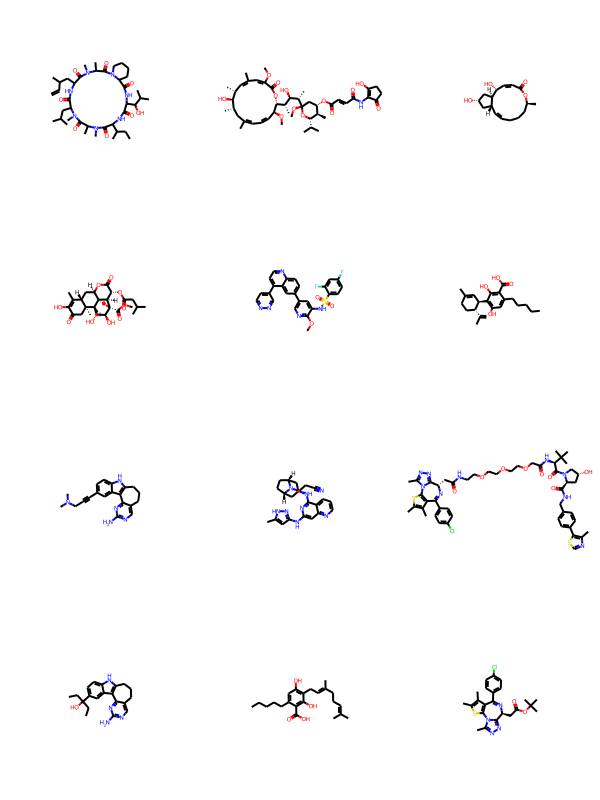

In [42]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smix) for smix in combined["Smiles"].iloc[0:12]])

In [43]:
#Before preparing your model, you should prepare your structures first to be enough to generate features to be used in your model
#There is a protocol for that

In [44]:
t1=Chem.SmilesMolSupplier("sars_cov_2.smi", delimiter="\t", titleLine=False)

In [45]:
#Generate chemical fingerprints as BitVector
#the idea how you differentiate one molecule from the other, so that your model can learn

In [46]:
fp=[AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in t1 if mol is not None]

In [47]:
#FP -> numpy array
train_df=np.asarray(fp,dtype=np.int32)

In [48]:
train_df

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int32)

In [49]:
train_df.shape

(4653, 2048)

In [50]:
ids=[mol.GetProp("_Name") for mol in t1 if mol is not None]

In [51]:
labels=np.asarray (ids, dtype=np.int64).reshape(-1,1)

In [52]:
labels

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [53]:
dataset=np.concatenate([train_df,labels],axis=1)

In [54]:
dataset

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [55]:
np.save("sars_cov_2-features", dataset)

In [56]:
#3 Model training and Validation

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [58]:
X_train,X_test,y_train,y_test=train_test_split(train_df,labels, test_size=0.25, shuffle=True, random_state=42)

In [59]:
X_train.shape

(3489, 2048)

In [60]:
X_test.shape

(1164, 2048)

In [61]:
#Generalized Model
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=42)

In [62]:
predicted=rf.predict(X_test)

In [63]:
roc_auc_score(y_test,predicted)

0.6252416287335536

In [64]:
from PyCm import *
cm = confusion_matrix(y_test.reshape(-1), predicted)

In [65]:
print(cm)

[[1097    9]
 [  43   15]]


In [66]:
#Hyperparameter Optimization is a method you can use to optimise/enhance the efficiency of your results
import pickle
with open("rf_model_sars_cov_2_rs.pkl", "wb") as f:
    pickle.dump(rf,f)

In [67]:
#Deploying your model for VS on a new chemical library
#Applying the model onto new chemical structures:
#generate features

In [68]:
import glob
path = "/home/compchem/JUDE/notebooks/Zinc_database_2"
all_files=glob.glob(os.path.join(path,"*.smi"))
cat=[]
for filename in all_files:
    y3=pd.read_csv(filename, index_col=None, header=0, sep="\s+")
    cat.append(y3)

In [69]:
cat

[                                       smiles     zinc_id
 0          CO[C@H]1OC[C@@H](O)[C@H](O)[C@H]1O     4371221
 1                   NC(=O)N[C@@H]1NC(=O)NC1=O     1843030
 2                          NC(=O)CN1CCC(N)CC1     9256947
 3                        CNC(=O)c1n[nH]c(N)n1    19844301
 4     NC(=O)[C@H]1[C@H]2C=C[C@@H](O2)[C@@H]1N   242677143
 ...                                       ...         ...
 2400               O=C1C[C@H](C(=O)O)NC(=O)N1      895194
 2401                   O=C1CC(=C2CNC2)C(=O)N1  1772715943
 2402                 N=C(N)NCCC[C@H](N)C(N)=O     1737947
 2403                           Nc1n[nH]c(N)n1     4118774
 2404              N[C@@H]1CS(=O)(=O)C[C@@H]1N    23224603
 
 [2405 rows x 2 columns],
                                          smiles    zinc_id
 0                      OCCC[C@@H](O)[C@@H](O)CO    2170627
 1     N[C@H]1[C@H](O)[C@@H](O)[C@H](CO)O[C@H]1O    5443821
 2                     NC(=O)CNC(=O)[C@@H]1CCCN1    8076087
 3                      

In [70]:
all_smiles=pd.concat(cat,axis=0,ignore_index=True)

In [71]:
all_smiles

,smiles,zinc_id
0,CO[C@H]1OC[C@@H](O)[C@H](O)[C@H]1O,4371221
1,NC(=O)N[C@@H]1NC(=O)NC1=O,1843030
2,NC(=O)CN1CCC(N)CC1,9256947
3,CNC(=O)c1n[nH]c(N)n1,19844301
4,NC(=O)[C@H]1[C@H]2C=C[C@@H](O2)[C@@H]1N,242677143
...,...,...
27785,C#CCNC(=O)c1nnc(O)nc1O,1319873477
27786,O=C(NCC#CCO)NC/C=C\CO,923765708
27787,CN(CC(N)=O)C(=O)CC#N,37269134
27788,C=C[C@H](CO)NC(=O)C(=O)NC,307972725


In [72]:
all_smiles.to_csv("Zinc_Library_27k.smi",index=None,header=None,sep="\t")

In [73]:
t1=Chem.SmilesMolSupplier("Zinc_Library_27k.smi", delimiter="\t", titleLine=False)
zinc_fp=[AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in t1 if mol is not None]
zinc_df=np.asarray(zinc_fp,dtype=np.int64)
zinc_ids=[mol.GetProp("_Name") for mol in t1 if mol is not None]
zinc_labels=np.asarray (zinc_ids, dtype=np.int64).reshape(-1,1)

In [74]:
zinc_df.shape

(27790, 2048)

In [75]:
zinc_predicted=rf.predict(zinc_df)

In [76]:
zinc_predicted.shape

(27790,)

In [77]:
 predicted=pd.DataFrame(zinc_predicted)

In [78]:
predicted[0].value_counts()

0
0    27790
Name: count, dtype: int64